Importando los paquetes necesarios para el analisis

In [ ]:
!pip install scikit-learn-extra --user

In [1]:
import pandas as pd   #Para usar dataframes y leer csv 
import numpy as np    #Para operaciones con vectores y matematicas basicas
import time           #Para obtener tiempo del sistema
import datetime       #Para operaciones con tiempos
import matplotlib.pyplot as plt #Para visualizacion de los datos
plt.style.use('ggplot')
import folium         #Para vizuakizacion de mapas
import re             #Para expresiones regulares
from sklearn_extra.cluster import KMedoids   #Para agrupar
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer  # Visualizador
from tqdm import tqdm 
from sklearn.metrics import silhouette_score

/home/jaarciah/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Leyendo los datos ya preprocesados.

In [2]:
start = time.time()
hurtos_moto = pd.read_csv(r'https://raw.githubusercontent.com/jaarciah/Proyecto-Integrador-2020-periodo-2/master/Data/Preprocessing/hurto_motos_dummy_ingCaracteristicas.csv', sep = ";").copy()
#comunas_med = pd.read_csv('comunas_med.csv', sep = ";").copy()
end = time.time()
print("El tiempo que tomó en leer el archivo {}".format((end-start)))
hurtos_moto.head()

El tiempo que tomó en leer el archivo 1.0178236961364746


,fecha_hecho,latitud,longitud,estado_civil,medio_transporte,modalidad,arma_medio,nombre_barrio,codigo_comuna,lugar,...,mes,dia,dia_semana,hora,hora_min_sec,festivos,quincena,week_number,ferias_fiestas,franja_horaria
0,2017-01-01 23:00:00,6.268040,-75.549892,0,0,0,0,0,0,0,...,1,1,6,23,23:00:00,1,1,52,0,2
1,2017-01-01 20:30:00,6.290076,-75.556893,1,1,1,1,1,1,0,...,1,1,6,20,20:30:00,1,1,52,0,2
2,2017-01-01 07:00:00,6.304187,-75.551760,1,0,0,0,2,1,0,...,1,1,6,7,07:00:00,1,1,52,0,0
3,2017-01-01 09:00:00,6.248002,-75.574849,2,1,1,2,3,2,1,...,1,1,6,9,09:00:00,1,1,52,0,0
4,2017-01-01 16:30:00,6.268129,-75.557882,0,0,0,0,4,3,2,...,1,1,6,16,16:30:00,1,1,52,0,1


### K-Medoids Clustering

In [3]:
# Calculamos por el método del codo el numero de clusters adecuado.
hurtos_moto2 = pd.DataFrame(hurtos_moto.groupby(['latitud','longitud'])['codigo_comuna'].count())
hurtos_moto2.reset_index(inplace = True)
hurtos_moto2 = hurtos_moto2.rename(columns={'codigo_comuna':'Cant'})
hurtos_moto2.head()

,latitud,longitud,Cant
0,6.154720,-75.420205,1
1,6.167317,-75.646279,1
2,6.167623,-75.646652,1
3,6.167736,-75.686965,72
4,6.167736,-75.646863,1


In [4]:
X = np.array(hurtos_moto[['latitud','longitud']], dtype='float64')

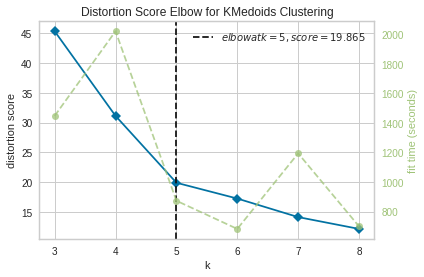

El tiempo que tomó Realizar los calculos 6919.500785589218


In [5]:
start = time.time()
modelelbkmds = KMedoids(random_state=123, init='k-medoids++')
visualizerelbkmds = KElbowVisualizer(modelelbkmds, k=(3,9))

visualizerelbkmds.fit(X)    # Fit the data to the visualizer
visualizerelbkmds.poof()    # Draw/show/poof the data
end = time.time()
print("El tiempo que tomó Realizar los calculos {}".format((end-start)))

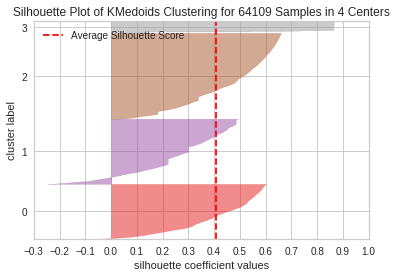

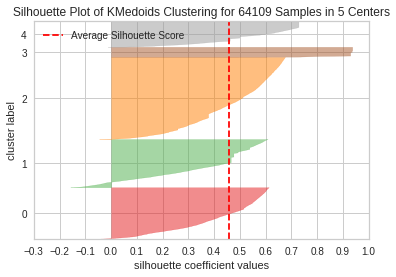

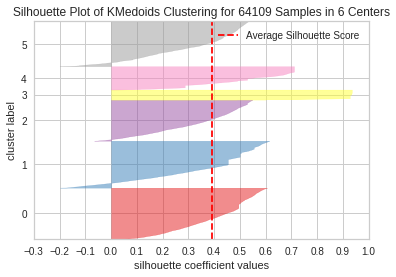

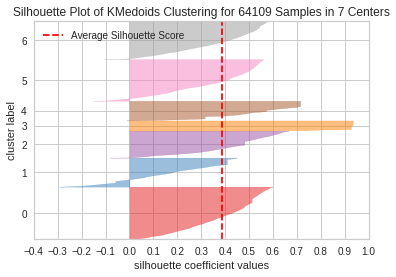

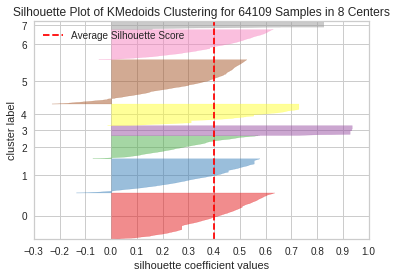

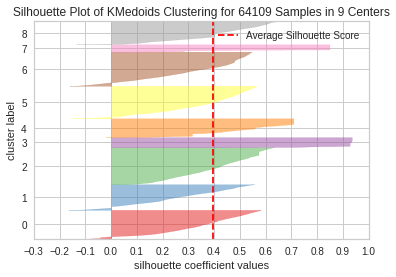

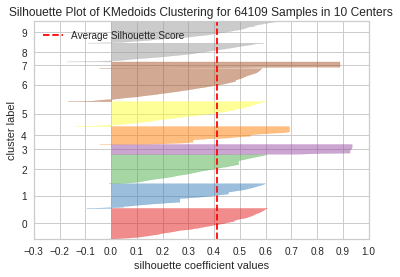

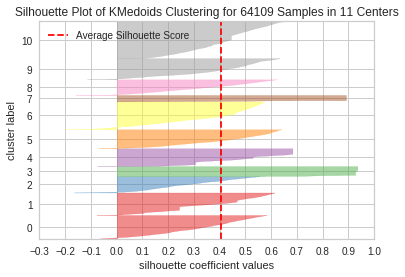

El tiempo que tomó Realizar los calculos 7893.0768365859985


In [14]:
start = time.time()
n_cluster = np.arange(4,12)
for idx, valor in enumerate(n_cluster):
    modelkmds = KMedoids(valor,random_state=123,init='k-medoids++')
    visualizerkmds = SilhouetteVisualizer(modelkmds)
    visualizerkmds.fit(X)    # Fit the data to the visualizer
    visualizerkmds.poof()    # Draw/show/poof the data
end = time.time()
print("El tiempo que tomó Realizar los calculos {}".format((end-start)))

El tiempo que tomó Realizar los calculos 813.8779120445251


In [13]:
start = time.time()
best_silhouette, best_k = -1, 0
for k in tqdm(range(2, 10)):
    #model = KMeans(n_clusters=k, random_state=1).fit(X)
    model = KMedoids(valor,random_state=123,init='k-medoids++').fit(X)
    class_predictions = model.predict(X)
    
    curr_silhouette = silhouette_score(X, class_predictions)
    if curr_silhouette > best_silhouette:
        best_k = k
        best_silhouette = curr_silhouette
        
print(f'K={best_k}')
print(f'Silhouette Score: {best_silhouette}') 
end = time.time()
print("El tiempo que tomó Realizar los calculos {}".format((end-start)))

100%|██████████| 8/8 [1:19:10<00:00, 593.87s/it]

K=2
Silhouette Score: 0.40596583283811116
El tiempo que tomó Realizar los calculos 4750.983187675476


In [15]:
start = time.time()
modelkmds = KMedoids(5,random_state=123,init='k-medoids++')
model = modelkmds.fit(X)
end = time.time()
print("El tiempo que tomó Realizar los calculos {}".format((end-start)))

El tiempo que tomó Realizar los calculos 774.9852905273438


In [16]:
import pickle
# Save to file in the current working directory
pkl_filename = "Kmedoids5.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [18]:
class_predictions = model.predict(X)
k=5
hurtos_moto[f'CLUSTER_kmedoids{k}'] = class_predictions

In [19]:
hurtos_moto.to_csv('hurto_motos_dummy_Kmedoids5_co.csv', index = False)

In [20]:
start = time.time()
modelkmds = KMedoids(n_clusters=6,metric="cosine",random_state=123,init='k-medoids++')
model = modelkmds.fit(X)
end = time.time()
print("El tiempo que tomó Realizar los calculos {}".format((end-start)))

El tiempo que tomó Realizar los calculos 1529.3230783939362


In [ ]:
import pickle
# Save to file in the current working directory
pkl_filename = "Kmedoids5_cosine.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)